1_Installing all the packages required for Data analysis

In [1]:
pip install -r Packages.txt

2_Importing the packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns


3_File paths of clinical and proteomic Data of TMT1

In [3]:
file_path_sample = r'D:\Alzheimer_s dataset\brain\TMT\TMT1_proteomics_brain.xlsx'
file_path_metadata = r'D:\Alzheimer_s dataset\brain\TMT\TMT1_clinical_brain.xlsx'

original_data = pd.read_excel(file_path_sample)
original_metadata = pd.read_excel(file_path_metadata)

#copying the data to maintain the originalilty of the data
data = original_data.copy()
metadata = original_metadata.copy()

#Dimension of the data
print(data.shape)
print(metadata.shape)

#visualization of the data points
data.head()
print(data.iloc[:, 0:2])
metadata.head()

(3870, 119)
(118, 8)
     Unnamed: 0  Banner.b01.127C
0        Q14204         609985.6
1        Q01082         820674.0
2        Q03001         151548.7
3        Q9UPA5         157454.4
4        P46821         496145.6
...         ...              ...
3865     P02749            997.1
3866     P30536           2014.4
3867     Q9BZW5            235.5
3868     P62875           1058.5
3869     P56277           1250.6

[3870 rows x 2 columns]


,sample,age,sex,pmi,disease_group,batch,study,batch_org
0,Banner.b18.127C,90,0,3.50,AD,1,Banner,18
1,Banner.b03.131N,78,1,3.33,AD,1,Banner,3
2,Banner.b01.129C,81,1,2.83,AD,1,Banner,1
3,Banner.b10.127C,89,1,5.50,Control,1,Banner,10
4,Banner.b22.127C,83,1,3.00,AD,1,Banner,22


4_Preprocessing the proteomic Data

In [4]:
#rename the first column to Protein_ID
data.rename(columns={'Unnamed: 0': 'Protein_ID'}, inplace=True)
data

#Only the intensity columns
Banner_intensity_columns = data.columns[1:]
data_intensity = data.loc[:, Banner_intensity_columns]
data_intensity

#only the protein ID column
data_protein_ID = data.loc[:, 'Protein_ID']
data_protein_ID



0       Q14204
1       Q01082
2       Q03001
3       Q9UPA5
4       P46821
         ...  
3865    P02749
3866    P30536
3867    Q9BZW5
3868    P62875
3869    P56277
Name: Protein_ID, Length: 3870, dtype: object

5_Log2 tranformation to stabilize variance and normalize distribution

In [5]:
df_log_transformed = np.log1p(data_intensity)
print(df_log_transformed)

      Banner.b01.127C  Banner.b01.129C  Banner.b01.129N  Banner.b01.130C  \
0           13.321192        13.249261        13.259962        13.270852   
1           13.617882        13.627235        13.631304        13.642417   
2           11.928669        12.010890        11.959158        11.939813   
3           11.966898        11.934280        12.020679        11.966448   
4           13.114627        13.130660        13.114795        13.202272   
...               ...              ...              ...              ...   
3865         6.905853         5.880812         6.083816         5.909169   
3866         7.608573         7.893311         7.494263         7.648311   
3867         5.465948         5.588746         5.509388         5.588746   
3868         6.965552         6.918201         6.983697         6.955593   
3869         7.132178         7.385293         7.233239         7.215314   

      Banner.b02.127C  Banner.b02.127N  Banner.b02.129C  Banner.b02.129N  \
0          

6_Normalization

[[ 3.22022646  3.1781861   3.16668869 ...  3.10826987  3.14194994
   3.1329813 ]
 [ 3.43891084  3.45850838  3.44005491 ...  3.3251647   3.37686729
   3.36898452]
 [ 2.19382546  2.25975558  2.20909072 ...  2.11423535  2.17675121
   2.16394765]
 ...
 [-2.56971617 -2.50318964 -2.53895981 ...         nan         nan
          nan]
 [-1.46438805 -1.51720735 -1.45363518 ...         nan         nan
          nan]
 [-1.34157165 -1.17079104 -1.26993315 ... -1.45414839 -1.49883731
  -1.37644354]]
[[0.94287686 0.93955975 0.94078585 ... 0.94308867 0.94327772 0.93990651]
 [0.97464034 0.98006546 0.97971696 ... 0.9716813  0.97473507 0.97085639]
 [0.7937941  0.80684937 0.80441074 ... 0.81204791 0.81402975 0.81282576]
 ...
 [0.10189889 0.11861843 0.12822308 ...        nan        nan        nan]
 [0.26244566 0.26108984 0.28278822 ...        nan        nan        nan]
 [0.28028451 0.31114593 0.30894992 ... 0.34163796 0.32183852 0.34853272]]
      Banner.b01.127C  Banner.b01.129C  Banner.b01.129N  Banner.

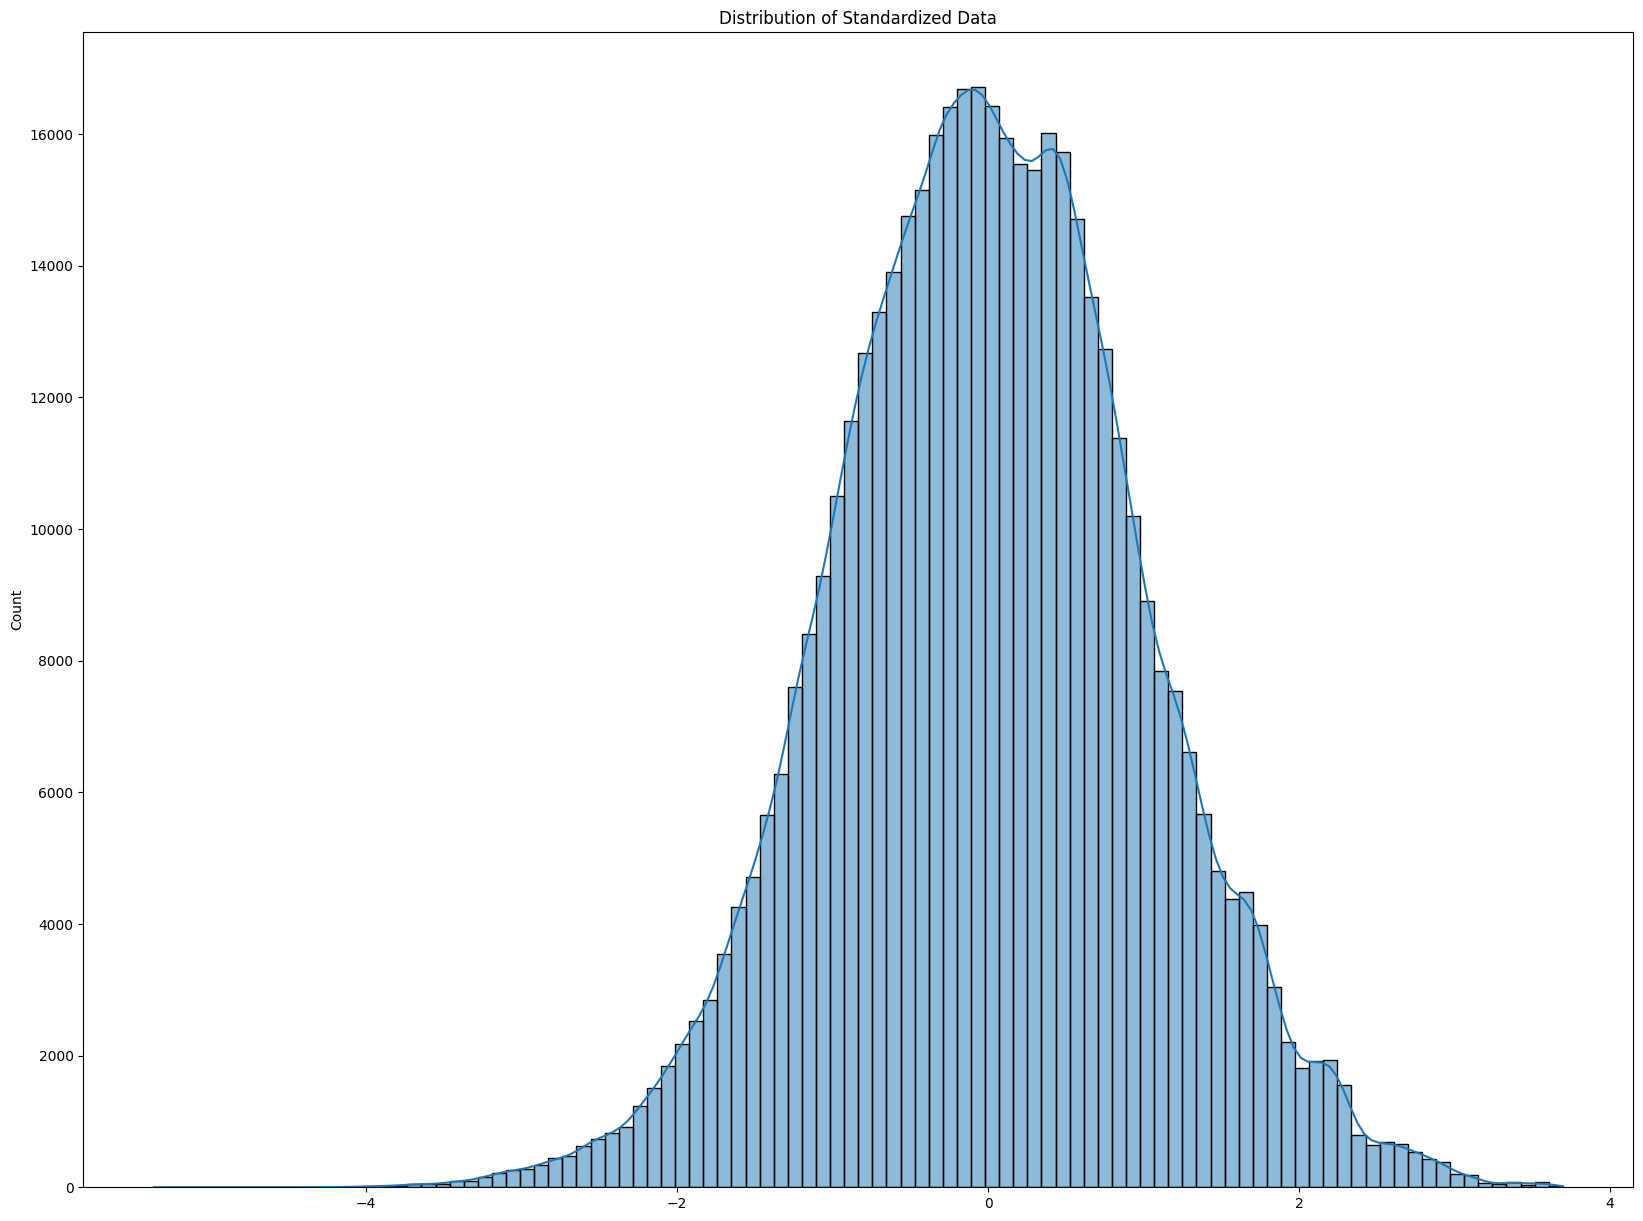

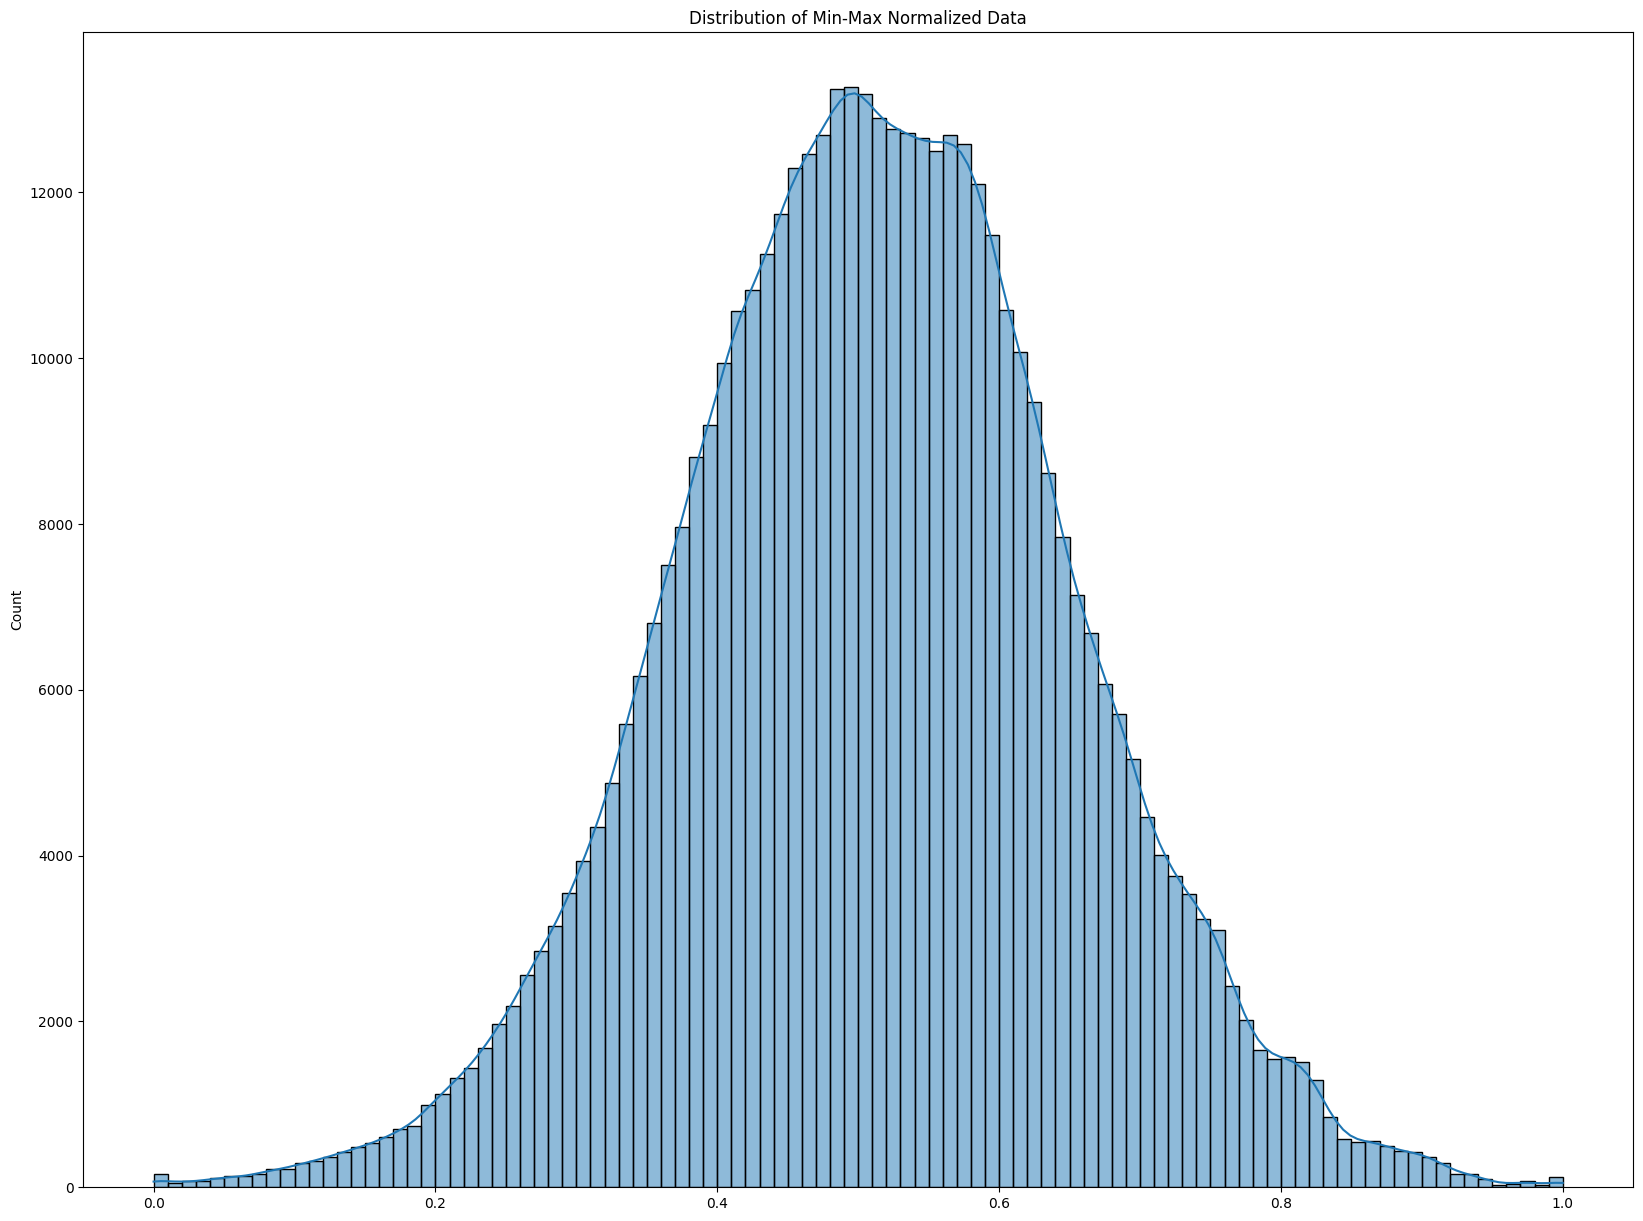

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Normalization of data
# Standardization (Z-score normalization)
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_log_transformed)
print(df_standardized)
# Min-Max Normalization
min_max_scaler = MinMaxScaler()
df_min_max_scaled = min_max_scaler.fit_transform(df_log_transformed)
print(df_min_max_scaled)
#scaling
data_scaled = pd.DataFrame(data=df_min_max_scaled, columns=data_intensity.columns) 
print(data_scaled) 

# Visualizing the normalized data
plt.figure(figsize=(20, 15))
sns.histplot(df_standardized.flatten(), kde=True, bins=100,) #bins100 to make the plot more clear
plt.title("Distribution of Standardized Data")
plt.show()

plt.figure(figsize=(20, 15))
sns.histplot(df_min_max_scaled.flatten(), kde=True, bins=100) 
plt.title("Distribution of Min-Max Normalized Data")
plt.show()

7_Removal of rows containing nan values

In [7]:
#Count NaN values per row
nan_counts = data_scaled.isna().sum(axis=1).sum()   #there are totally 158 rows contating nan values in the data
print(nan_counts)

#Identify columns with more than 2 NaN values
# rows_to_remove = nan_counts[nan_counts > 2].index.tolist()
# print("rows with more than 2 NaN values:", rows_to_remove)
# print(len(rows_to_remove))

# rows with nan values are removed from a dataframe
data_filtered = data_scaled.dropna(axis=0)
print(data_filtered)

2199
      Banner.b01.127C  Banner.b01.129C  Banner.b01.129N  Banner.b01.130C  \
0            0.942877         0.939560         0.940786         0.938573   
1            0.974640         0.980065         0.979717         0.977986   
2            0.793794         0.806849         0.804411         0.797387   
3            0.797887         0.798639         0.810861         0.800212   
4            0.920762         0.926850         0.925567         0.931299   
...               ...              ...              ...              ...   
3857         0.394383         0.417473         0.394123         0.376626   
3860         0.272452         0.279223         0.309546         0.297047   
3862         0.435895         0.416044         0.395066         0.400856   
3866         0.331287         0.365588         0.336315         0.342176   
3869         0.280285         0.311146         0.308950         0.296247   

      Banner.b02.127C  Banner.b02.127N  Banner.b02.129C  Banner.b02.129N  \
0     

8_Outlier detection and removal

In [8]:
from scipy.stats import zscore

# Z-scores
z_scores = data_filtered.apply(zscore)
print(z_scores)
# threshold for identifying outliers
threshold = 3

# Rows to keep
rows_to_keep = (z_scores < threshold).all(axis=1)
# print(rows_to_keep)
# len(rows_to_keep)


data_no_outliers = data_filtered[rows_to_keep]
data_no_outliers
print(data_no_outliers)
# outliers = [(z_scores > 3).all(axis=1)]
# print(outliers)

print(f'Original data shape: {data.shape}')
print(f'Data shape after sclaing: {data_scaled.shape}')
print(f'Data shape after nan values removal: {data_filtered.shape}')
print(f'Data shape after outlier removal: {data_no_outliers.shape}')

      Banner.b01.127C  Banner.b01.129C  Banner.b01.129N  Banner.b01.130C  \
0            3.324746         3.282432         3.271530         3.285287   
1            3.555565         3.578523         3.560391         3.574566   
2            2.241391         2.312336         2.259657         2.249018   
3            2.271132         2.252322         2.307514         2.269755   
4            3.164042         3.189524         3.158608         3.231895   
...               ...              ...              ...              ...   
3857        -0.661052        -0.533954        -0.784591        -0.839242   
3860        -1.547099        -1.544545        -1.412128        -1.423326   
3862        -0.359391        -0.544401        -0.777592        -0.661395   
3866        -1.119555        -0.913228        -1.213507        -1.092094   
3869        -1.490181        -1.311191        -1.416553        -1.429200   

      Banner.b02.127C  Banner.b02.127N  Banner.b02.129C  Banner.b02.129N  \
0          

9_Prprocessed proteomic data

In [9]:
# Merging the preprocessed data with protein ID
processed_df = data_no_outliers.merge(data_protein_ID, left_index=True, right_index=True)

# Reordering the columns
cols = processed_df.columns.tolist()
new_cols = [cols[-1]] + cols[:-1]
processed_df = processed_df[new_cols]
processed_df

,Protein_ID,Banner.b01.127C,Banner.b01.129C,Banner.b01.129N,Banner.b01.130C,Banner.b02.127C,Banner.b02.127N,Banner.b02.129C,Banner.b02.129N,Banner.b02.130C,...,Banner.b21.129C,Banner.b21.130C,Banner.b21.131N,Banner.b22.127C,Banner.b22.127N,Banner.b22.128N,Banner.b22.129C,Banner.b22.129N,Banner.b22.130C,Banner.b22.130N
2,Q03001,0.793794,0.806849,0.804411,0.797387,0.811064,0.797555,0.794079,0.800812,0.801597,...,0.804142,0.801558,0.791096,0.812213,0.821614,0.811690,0.813009,0.812048,0.814030,0.812826
3,Q9UPA5,0.797887,0.798639,0.810861,0.800212,0.800206,0.784652,0.802852,0.787941,0.804468,...,0.799950,0.794441,0.801366,0.805217,0.802010,0.807331,0.816509,0.820137,0.804435,0.813558
5,Q09666,0.808218,0.838980,0.825216,0.811385,0.853693,0.834367,0.827541,0.835004,0.811437,...,0.832670,0.825140,0.821861,0.859115,0.833249,0.829033,0.827484,0.857417,0.853695,0.855357
6,Q9Y4G6,0.796770,0.807406,0.812318,0.807874,0.805791,0.800789,0.804958,0.801459,0.811822,...,0.808943,0.802452,0.801889,0.820343,0.822688,0.817395,0.817941,0.828767,0.820031,0.823254
7,O15020,0.791914,0.800303,0.800979,0.798513,0.799589,0.794195,0.792411,0.790792,0.801029,...,0.802888,0.800739,0.792251,0.803259,0.806628,0.798358,0.808641,0.806562,0.801218,0.805413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3857,P60903,0.394383,0.417473,0.394123,0.376626,0.437584,0.468112,0.451651,0.427333,0.427344,...,0.430601,0.406089,0.427018,0.520917,0.485515,0.468673,0.472823,0.507283,0.473131,0.479685
3860,Q9BQC6,0.272452,0.279223,0.309546,0.297047,0.379732,0.371921,0.371960,0.367206,0.376301,...,0.418345,0.411141,0.407185,0.416822,0.447069,0.409027,0.438812,0.432997,0.415753,0.417396
3862,P06703,0.435895,0.416044,0.395066,0.400856,0.487932,0.497047,0.456993,0.504519,0.468704,...,0.526839,0.526270,0.514287,0.561262,0.555102,0.525273,0.550487,0.557387,0.532493,0.536646
3866,P30536,0.331287,0.365588,0.336315,0.342176,0.400886,0.388825,0.361425,0.373328,0.365640,...,0.425838,0.417118,0.414684,0.440121,0.444106,0.419355,0.444905,0.440162,0.426614,0.421193


10_Data Integration (proteomic and clinic data)

In [14]:
processed_df
# Transpose the processed dataframe and set the index to the first column (Sample)
df1_transposed = processed_df.set_index(processed_df.columns[0]).T
df1_transposed

# Merge the transposed dataframe with the metadata
merged_df = pd.merge(df1_transposed, metadata.set_index(metadata.columns[0]), left_index=True, right_index=True)
merged_df



,Q03001,Q9UPA5,Q09666,Q9Y4G6,O15020,Q02952,Q9Y490,Q12955,P35579,P49327,...,P06703,P30536,P56277,age,sex,pmi,disease_group,batch,study,batch_org
Banner.b01.127C,0.793794,0.797887,0.808218,0.796770,0.791914,0.816653,0.724105,0.758086,0.798568,0.794899,...,0.435895,0.331287,0.280285,86,0,2.50,AD,1,Banner,1
Banner.b01.129C,0.806849,0.798639,0.838980,0.807406,0.800303,0.834854,0.733493,0.755572,0.802688,0.800866,...,0.416044,0.365588,0.311146,81,1,2.83,AD,1,Banner,1
Banner.b01.129N,0.804411,0.810861,0.825216,0.812318,0.800979,0.824337,0.727744,0.763743,0.800215,0.797049,...,0.395066,0.336315,0.308950,75,0,2.75,Control,1,Banner,1
Banner.b01.130C,0.797387,0.800212,0.811385,0.807874,0.798513,0.821305,0.725272,0.763010,0.799233,0.796734,...,0.400856,0.342176,0.296247,81,0,4.00,AD,1,Banner,1
Banner.b02.127C,0.811064,0.800206,0.853693,0.805791,0.799589,0.829412,0.746777,0.761575,0.803144,0.799960,...,0.487932,0.400886,0.241778,74,0,3.00,AD,1,Banner,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Banner.b22.128N,0.811690,0.807331,0.829033,0.817395,0.798358,0.805540,0.749172,0.767103,0.805712,0.800095,...,0.525273,0.419355,0.327150,68,0,4.16,AD,1,Banner,22
Banner.b22.129C,0.813009,0.816509,0.827484,0.817941,0.808641,0.815979,0.750389,0.766205,0.811582,0.813330,...,0.550487,0.444905,0.368353,87,1,2.45,AD,1,Banner,22
Banner.b22.129N,0.812048,0.820137,0.857417,0.828767,0.806562,0.807490,0.775248,0.767442,0.821315,0.807129,...,0.557387,0.440162,0.341638,87,1,3.13,AD,1,Banner,22
Banner.b22.130C,0.814030,0.804435,0.853695,0.820031,0.801218,0.812616,0.761693,0.769010,0.800570,0.807426,...,0.532493,0.426614,0.321839,75,1,3.00,AD,1,Banner,22



rough draft

Number of zero values: 0
Number of NaN values: 2199
rows with more than 20 NaN values: [1238, 1752, 3039, 3209, 3430, 3447, 3470, 3515, 3589, 3636, 3640, 3673, 3692, 3714, 3760, 3775, 3778, 3796, 3803, 3808, 3827, 3836, 3841, 3843, 3847, 3851, 3856, 3864, 3865, 3867, 3868]
31
     Protein_ID  Banner.b01.127C  Banner.b01.129C  Banner.b01.129N  \
0        Q14204         609985.6         567649.5         573756.5   
1        Q01082         820674.0         828385.7         831762.8   
2        Q03001         151548.7         164535.9         156240.4   
3        Q9UPA5         157454.4         152401.4         166154.5   
4        P46821         496145.6         504164.6         496229.2   
...         ...              ...              ...              ...   
3861     P02654           1656.5           1186.2           2208.8   
3862     P06703           5353.4           4289.4           3147.4   
3863     Q99969              NaN              NaN              NaN   
3866     P30536        

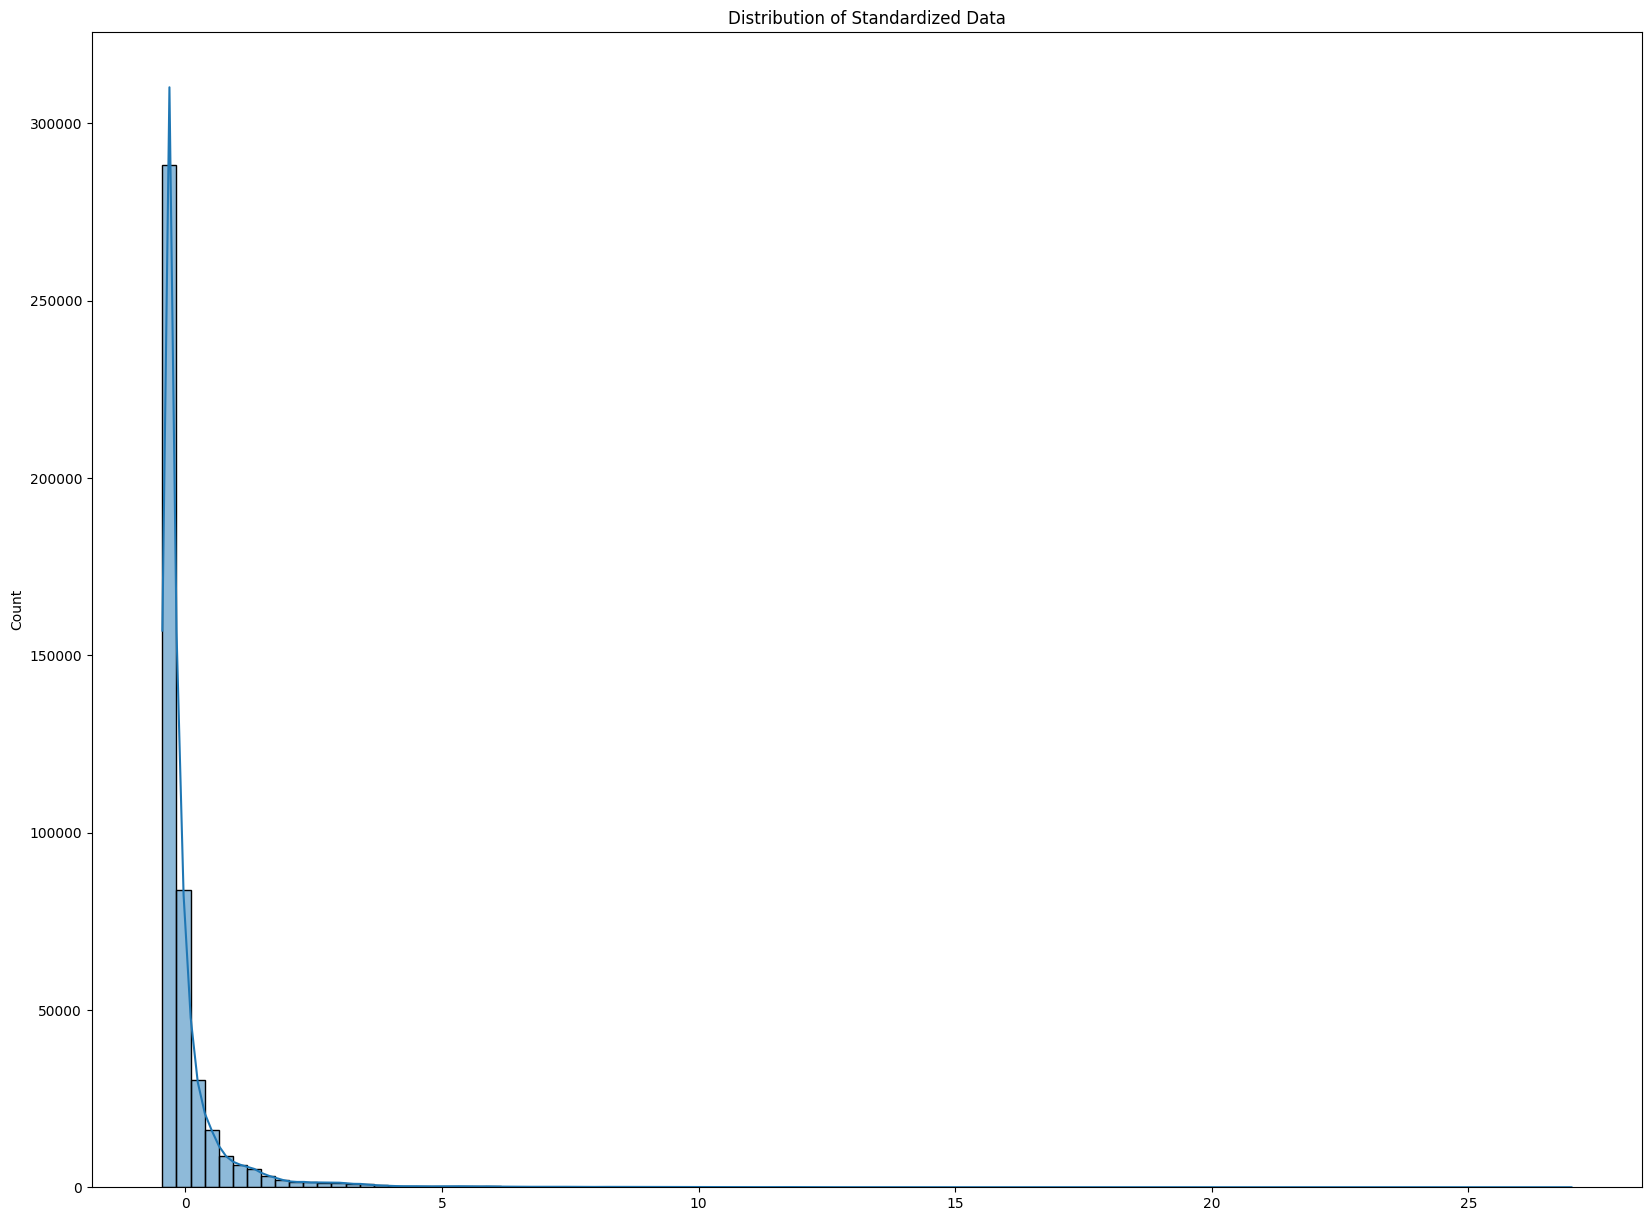

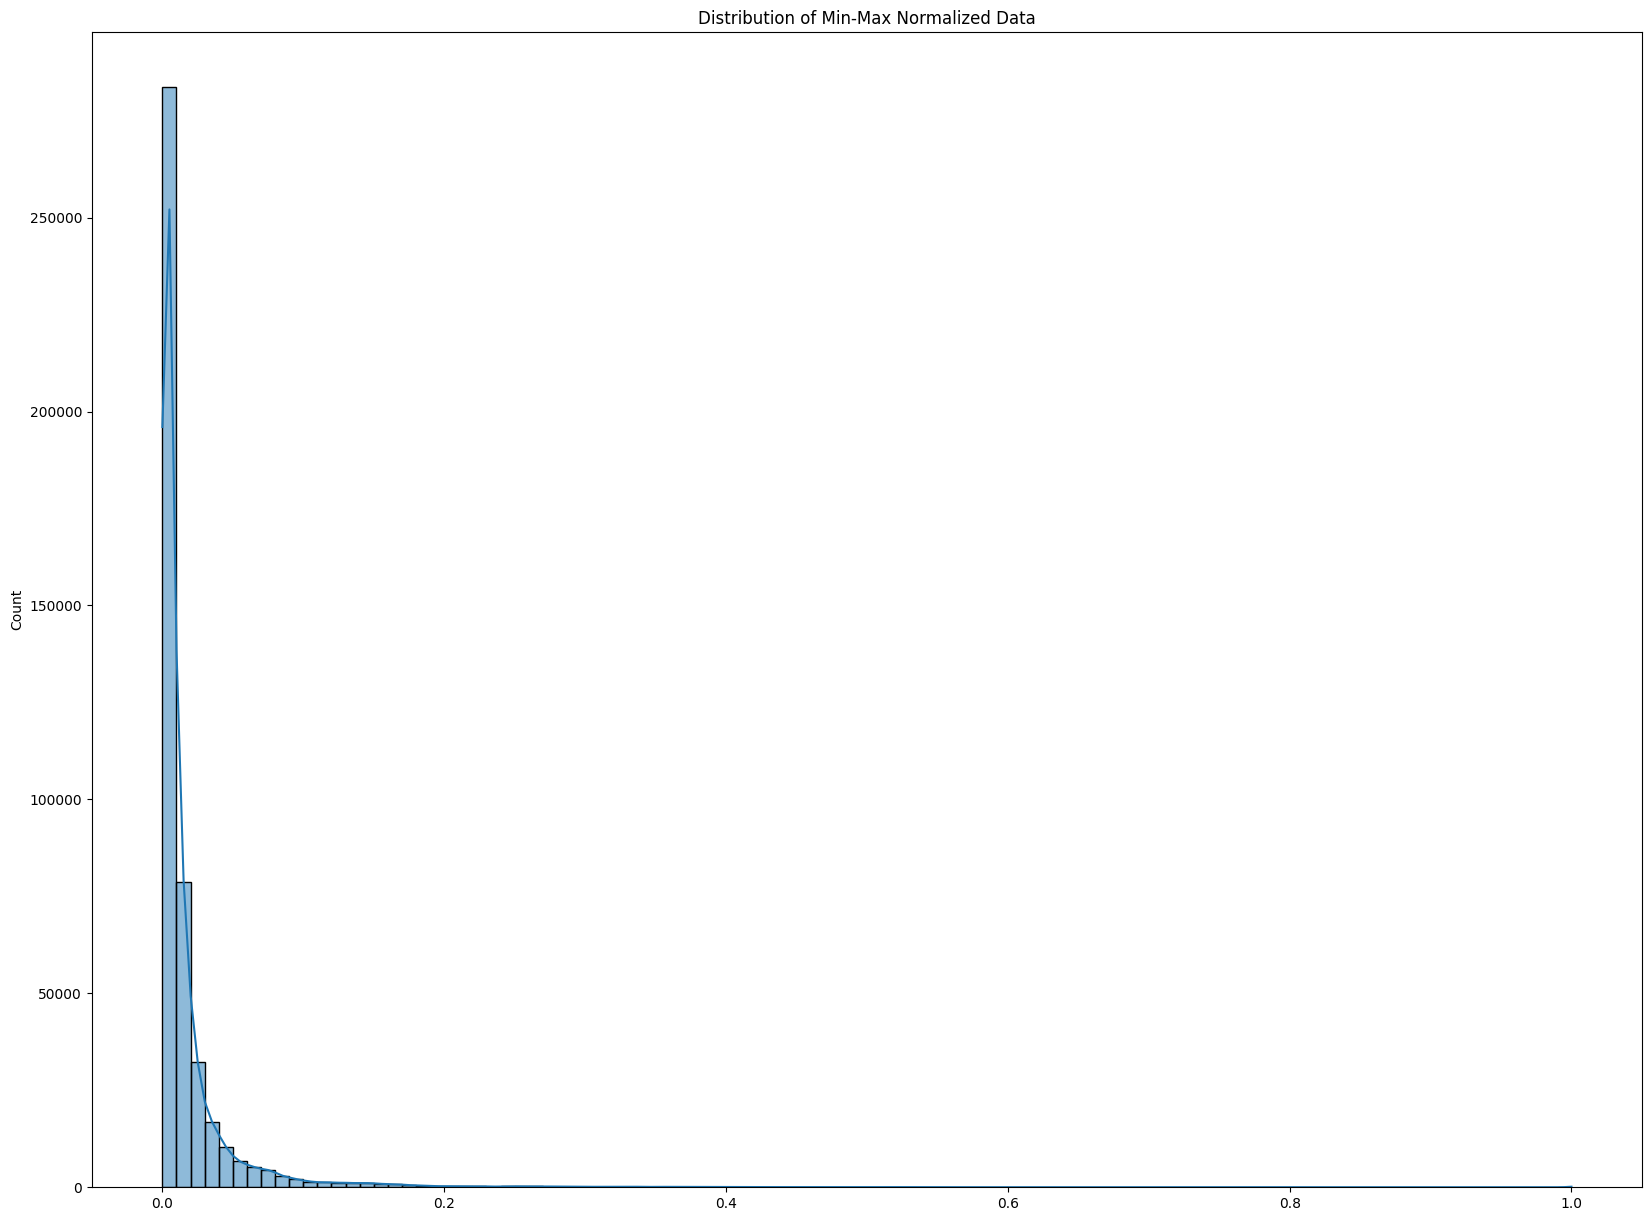

      Banner.b01.127C  Banner.b01.129C  Banner.b01.129N  Banner.b01.130C  \
0           13.321192        13.249261        13.259962        13.270852   
1           13.617882        13.627235        13.631304        13.642417   
2           11.928669        12.010890        11.959158        11.939813   
3           11.966898        11.934280        12.020679        11.966448   
4           13.114627        13.130660        13.114795        13.202272   
...               ...              ...              ...              ...   
3865         6.905853         5.880812         6.083816         5.909169   
3866         7.608573         7.893311         7.494263         7.648311   
3867         5.465948         5.588746         5.509388         5.588746   
3868         6.965552         6.918201         6.983697         6.955593   
3869         7.132178         7.385293         7.233239         7.215314   

      Banner.b02.127C  Banner.b02.127N  Banner.b02.129C  Banner.b02.129N  \
0          

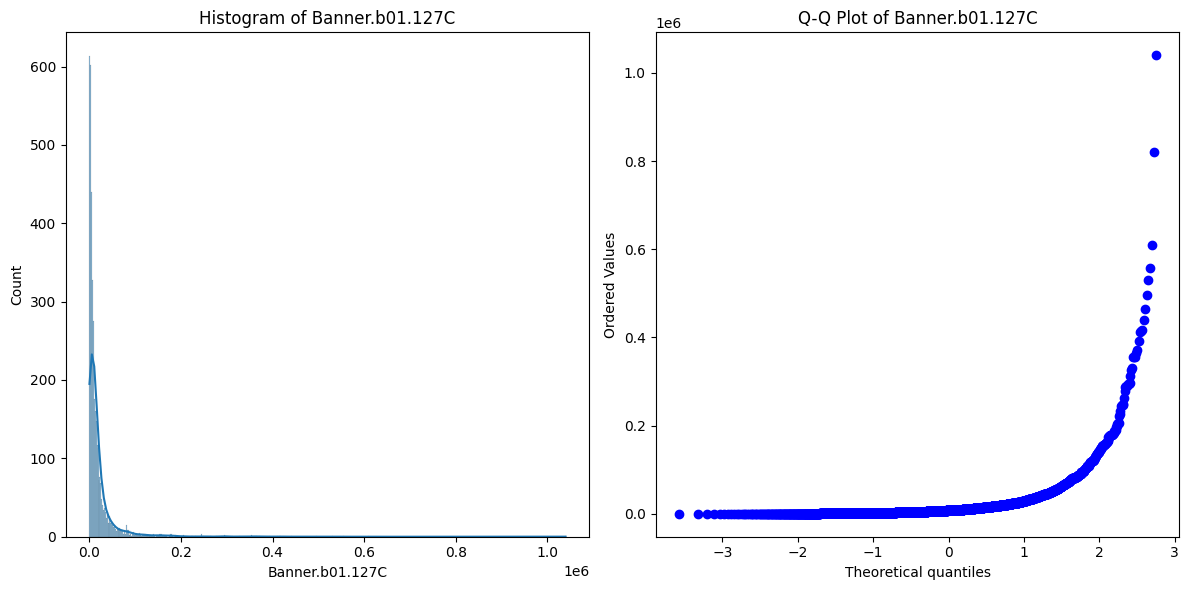

Normality test results for Banner.b01.127C:
119
Index(['Banner.b01.127C', 'Banner.b01.129C', 'Banner.b01.129N',
       'Banner.b01.130C', 'Banner.b02.127C', 'Banner.b02.127N',
       'Banner.b02.129C', 'Banner.b02.129N', 'Banner.b02.130C',
       'Banner.b02.130N',
       ...
       'Banner.b21.129C', 'Banner.b21.130C', 'Banner.b21.131N',
       'Banner.b22.127C', 'Banner.b22.127N', 'Banner.b22.128N',
       'Banner.b22.129C', 'Banner.b22.129N', 'Banner.b22.130C',
       'Banner.b22.130N'],
      dtype='object', length=118)
['Banner.b01.127C', 'Banner.b01.129C', 'Banner.b01.129N', 'Banner.b01.130C', 'Banner.b02.127C', 'Banner.b02.127N', 'Banner.b02.129C', 'Banner.b02.129N', 'Banner.b02.130C', 'Banner.b02.130N', 'Banner.b02.131N', 'Banner.b03.127N', 'Banner.b03.128N', 'Banner.b03.129C', 'Banner.b03.129N', 'Banner.b03.130N', 'Banner.b03.131N', 'Banner.b04.127N', 'Banner.b04.128C', 'Banner.b04.128N', 'Banner.b04.129N', 'Banner.b04.130N', 'Banner.b04.131N', 'Banner.b05.127C', 'Banner.b05.1

,sample,age,sex,pmi,disease_group,batch,study,batch_org
2,Banner.b01.129C,81,1,2.83,AD,1,Banner,1
40,Banner.b01.130C,81,0,4.00,AD,1,Banner,1
73,Banner.b01.129N,75,0,2.75,Control,1,Banner,1
66,Banner.b01.127C,86,0,2.50,AD,1,Banner,1
81,Banner.b02.129C,90,0,3.50,Control,1,Banner,2
...,...,...,...,...,...,...,...,...
4,Banner.b22.127C,83,1,3.00,AD,1,Banner,22
10,Banner.b22.127N,90,0,3.66,AD,1,Banner,22
69,Banner.b22.130C,75,1,3.00,AD,1,Banner,22
89,Banner.b22.129C,87,1,2.45,AD,1,Banner,22


In [11]:
# #rename the first column to Protein_ID
# data.rename(columns={'Unnamed: 0': 'Protein_ID'}, inplace=True)
# data

# #Only the intensity columns
# Banner_intensity_columns = data.columns[1:]
# data_intensity = data.loc[:, Banner_intensity_columns]
# data_intensity

# #Identify the number of zero values and nan_values in the data
# zero_values = (data_intensity == 0).sum().sum()
# nan_values = data_intensity.isna().sum().sum()
# print(f"Number of zero values: {zero_values}")  #there is no zero values in the data
# print(f"Number of NaN values: {nan_values}")    #there is 2199 NaN values in the data


# #check for duplicates in protein ID
# data = data.drop_duplicates(subset = 'Protein_ID', keep = 'first')


# #Count NaN values per row
# nan_counts = data.isna().sum(axis=1)
# #Identify columns with more than 20 NaN values (20 is just an example)
# rows_to_remove = nan_counts[nan_counts > 20].index.tolist()  
# #Print the columns to be removed
# print("rows with more than 20 NaN values:", rows_to_remove)
# print(len(rows_to_remove))

# # Nan values with row greater than 20 are removed from the dataframe
# data_filtered = data.drop(index=rows_to_remove)
# print(data_filtered)


# #Count NaN values per row
# nan_counts = data.isna().sum(axis=1)

# #Identify columns with more than 20 NaN values (20 is just an example)
# rows_to_remove = nan_counts[nan_counts > 20].index.tolist()

# #Print the columns to be removed
# print("rows with more than 20 NaN values:", rows_to_remove)
# print(len(rows_to_remove))

# # Nan values with row greater than 20 are removed from the dataframe
# data_filtered = data.drop(index=rows_to_remove)
# print(data_filtered)

# column_indices = [column_name for  column_name in data.columns]
# print(len(column_indices))

# row_indices = [row_name for row_name in data.index]
# print(len(row_indices))


# # Count NaN values per row
# nan_counts = data.isna().sum(axis=1)

# # Identify rows with more than 20 NaN values
# rows_to_impute = nan_counts.index
# print(rows_to_impute)
# # Impute NaN values in these rows with the mean of each column
# # Note: This assumes that the data is numeric. For categorical data, consider using mode or a placeholder value.
# data_intensity.loc[rows_to_impute] = data_intensity.loc[rows_to_impute].apply(lambda x: x.fillna(x.mean()), axis=1)
# print(data_intensity)

# # print("Imputed rows with more than 20 NaN values:", rows_to_impute.tolist())
# # print(data)

# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# # Normalization of data
# # Standardization (Z-score normalization)
# scaler = StandardScaler()
# df_standardized = scaler.fit_transform(data_intensity)
# print(df_standardized)
# # Min-Max Normalization
# min_max_scaler = MinMaxScaler()
# df_min_max_scaled = min_max_scaler.fit_transform(data_intensity)
# print(df_min_max_scaled)

# # Visualizing the normalized data
# plt.figure(figsize=(20, 15))
# sns.histplot(df_standardized.flatten(), kde=True, bins=100)
# plt.title("Distribution of Standardized Data")
# plt.show()

# plt.figure(figsize=(20, 15))
# sns.histplot(df_min_max_scaled.flatten(), kde=True, bins=100)
# plt.title("Distribution of Min-Max Normalized Data")
# plt.show()

# # log transformation
# df_log_transformed = np.log1p(data_intensity)
# print(df_log_transformed)

# def remove_outliers(df_log_transformed, column):
#     Q1 = df_log_transformed[column].quantile(0.25)
#     Q3 = df_log_transformed[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return df_log_transformed[(df_log_transformed[column] >= lower_bound) & (df_log_transformed[column] <= upper_bound)]
#     print(upper_bound, lower_bound)

# for col in df_log_transformed.columns:
#     df = remove_outliers(df_log_transformed, col)

# print(df)


# #Data distribution analysis
# print(data.describe())

# data_intensity.hist(bins=50, figsize=(200, 150))
# plt.show()


# #plot for each sample to analyze the distribution of the data (histogram and normality plot)
# def plot_histogram_and_qq(column):
#     plt.figure(figsize=(12, 6))
    
#     plt.subplot(1, 2, 1)
#     sns.histplot(data[column], kde=True)
#     plt.title(f'Histogram of {column}')
    
#     plt.subplot(1, 2, 2)
#     stats.probplot(data[column], dist="norm", plot=plt)
#     plt.title(f'Q-Q Plot of {column}')
    
#     plt.tight_layout()
#     plt.show()

# def check_normality(column):
#     print(f"Normality test results for {column}:")

# numeric_columns = data.select_dtypes(include=['float64']).columns
# first_numeric_column = numeric_columns[0]

# plot_histogram_and_qq(first_numeric_column)
# check_normality(first_numeric_column)



# # only select the relevant columns of the dataframe
# data = data.loc[:, columns]
# print(len(columns))
# data.shape
# print(Banner_intensity_channels)
# proteomics_channels = [i for i in data.columns if i.startswith('Banner.')]
# #len(proteomics_channels)
# #Clinical_channels = [i for i in metadata. if i.startswith('Banner.')]
# #Clinical_channels
# print(proteomics_channels)

# sorted_metadf = metadata.sort_values(by='batch_org', ascending=True)
# sorted_metadf